# EMPLOYEE ATTRITION WITHIN A YEAR PREDICTION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pt
%matplotlib inline
import warnings
import copy
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier as knc
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import GradientBoostingClassifier as gbc
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [3]:
from sklearn.metrics import classification_report as cr
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score as acs

In [4]:
df=pd.read_csv('model2.csv')

In [5]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Department_Software,Department_Support,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,58,0,200,13,5,1,33,4,5,4,17288,6,34,2,2,4,40,3,4,31,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
1,35,0,711,28,4,3,90,1,5,1,41000,6,47,4,4,3,1,1,4,1,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1
2,37,0,1077,16,5,3,142,2,3,2,28591,3,22,3,3,2,6,1,1,3,3,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,34,1,1199,10,2,2,197,2,1,4,22968,2,2,1,4,1,7,4,3,6,5,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,48,0,184,34,3,3,123,1,3,1,16527,1,14,2,4,2,17,6,2,11,6,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1


### creating a column "attrition_within_a_year" using YearAtCompany column
To see whether an employee get attritioned with in a year or not.

In [6]:
a = []
for i in range(len(df['Attrition'])):
    if df['YearsAtCompany'][i]==1 and df['Attrition'][i]==1:
        a.append(df['YearsAtCompany'][i])
    else:
        a.append(0)

In [7]:
len(a)

546221

Appending this list "a" to the df as a new column "Attrition_within_a_year".

In [8]:
df["Attrition_within_a_year"]=a

In [9]:
df.head(29)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Department_Software,Department_Support,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Attrition_within_a_year
0,58,0,200,13,5,1,33,4,5,4,17288,6,34,2,2,4,40,3,4,31,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
1,35,0,711,28,4,3,90,1,5,1,41000,6,47,4,4,3,1,1,4,1,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0
2,37,0,1077,16,5,3,142,2,3,2,28591,3,22,3,3,2,6,1,1,3,3,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,34,1,1199,10,2,2,197,2,1,4,22968,2,2,1,4,1,7,4,3,6,5,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,48,0,184,34,3,3,123,1,3,1,16527,1,14,2,4,2,17,6,2,11,6,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
5,33,0,595,2,2,3,85,4,4,2,3953,1,1,3,4,1,13,6,4,9,2,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
6,31,1,1015,25,3,1,114,2,5,1,28608,1,20,3,1,2,8,6,2,7,6,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
7,30,0,1188,33,3,4,101,2,5,2,24910,0,49,3,1,4,10,6,4,7,5,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
8,54,1,693,29,4,2,105,4,5,3,16467,3,20,3,1,3,13,2,3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1
9,55,1,1373,34,2,1,83,3,2,3,41927,6,13,2,4,2,33,6,2,29,8,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0


In [10]:
df.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'Department_Software', 'Department_Support',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing D

In [11]:
df["Attrition_within_a_year"].unique()

array([0, 1], dtype=int64)

In [12]:
df.drop("Attrition",axis=1,inplace=True)

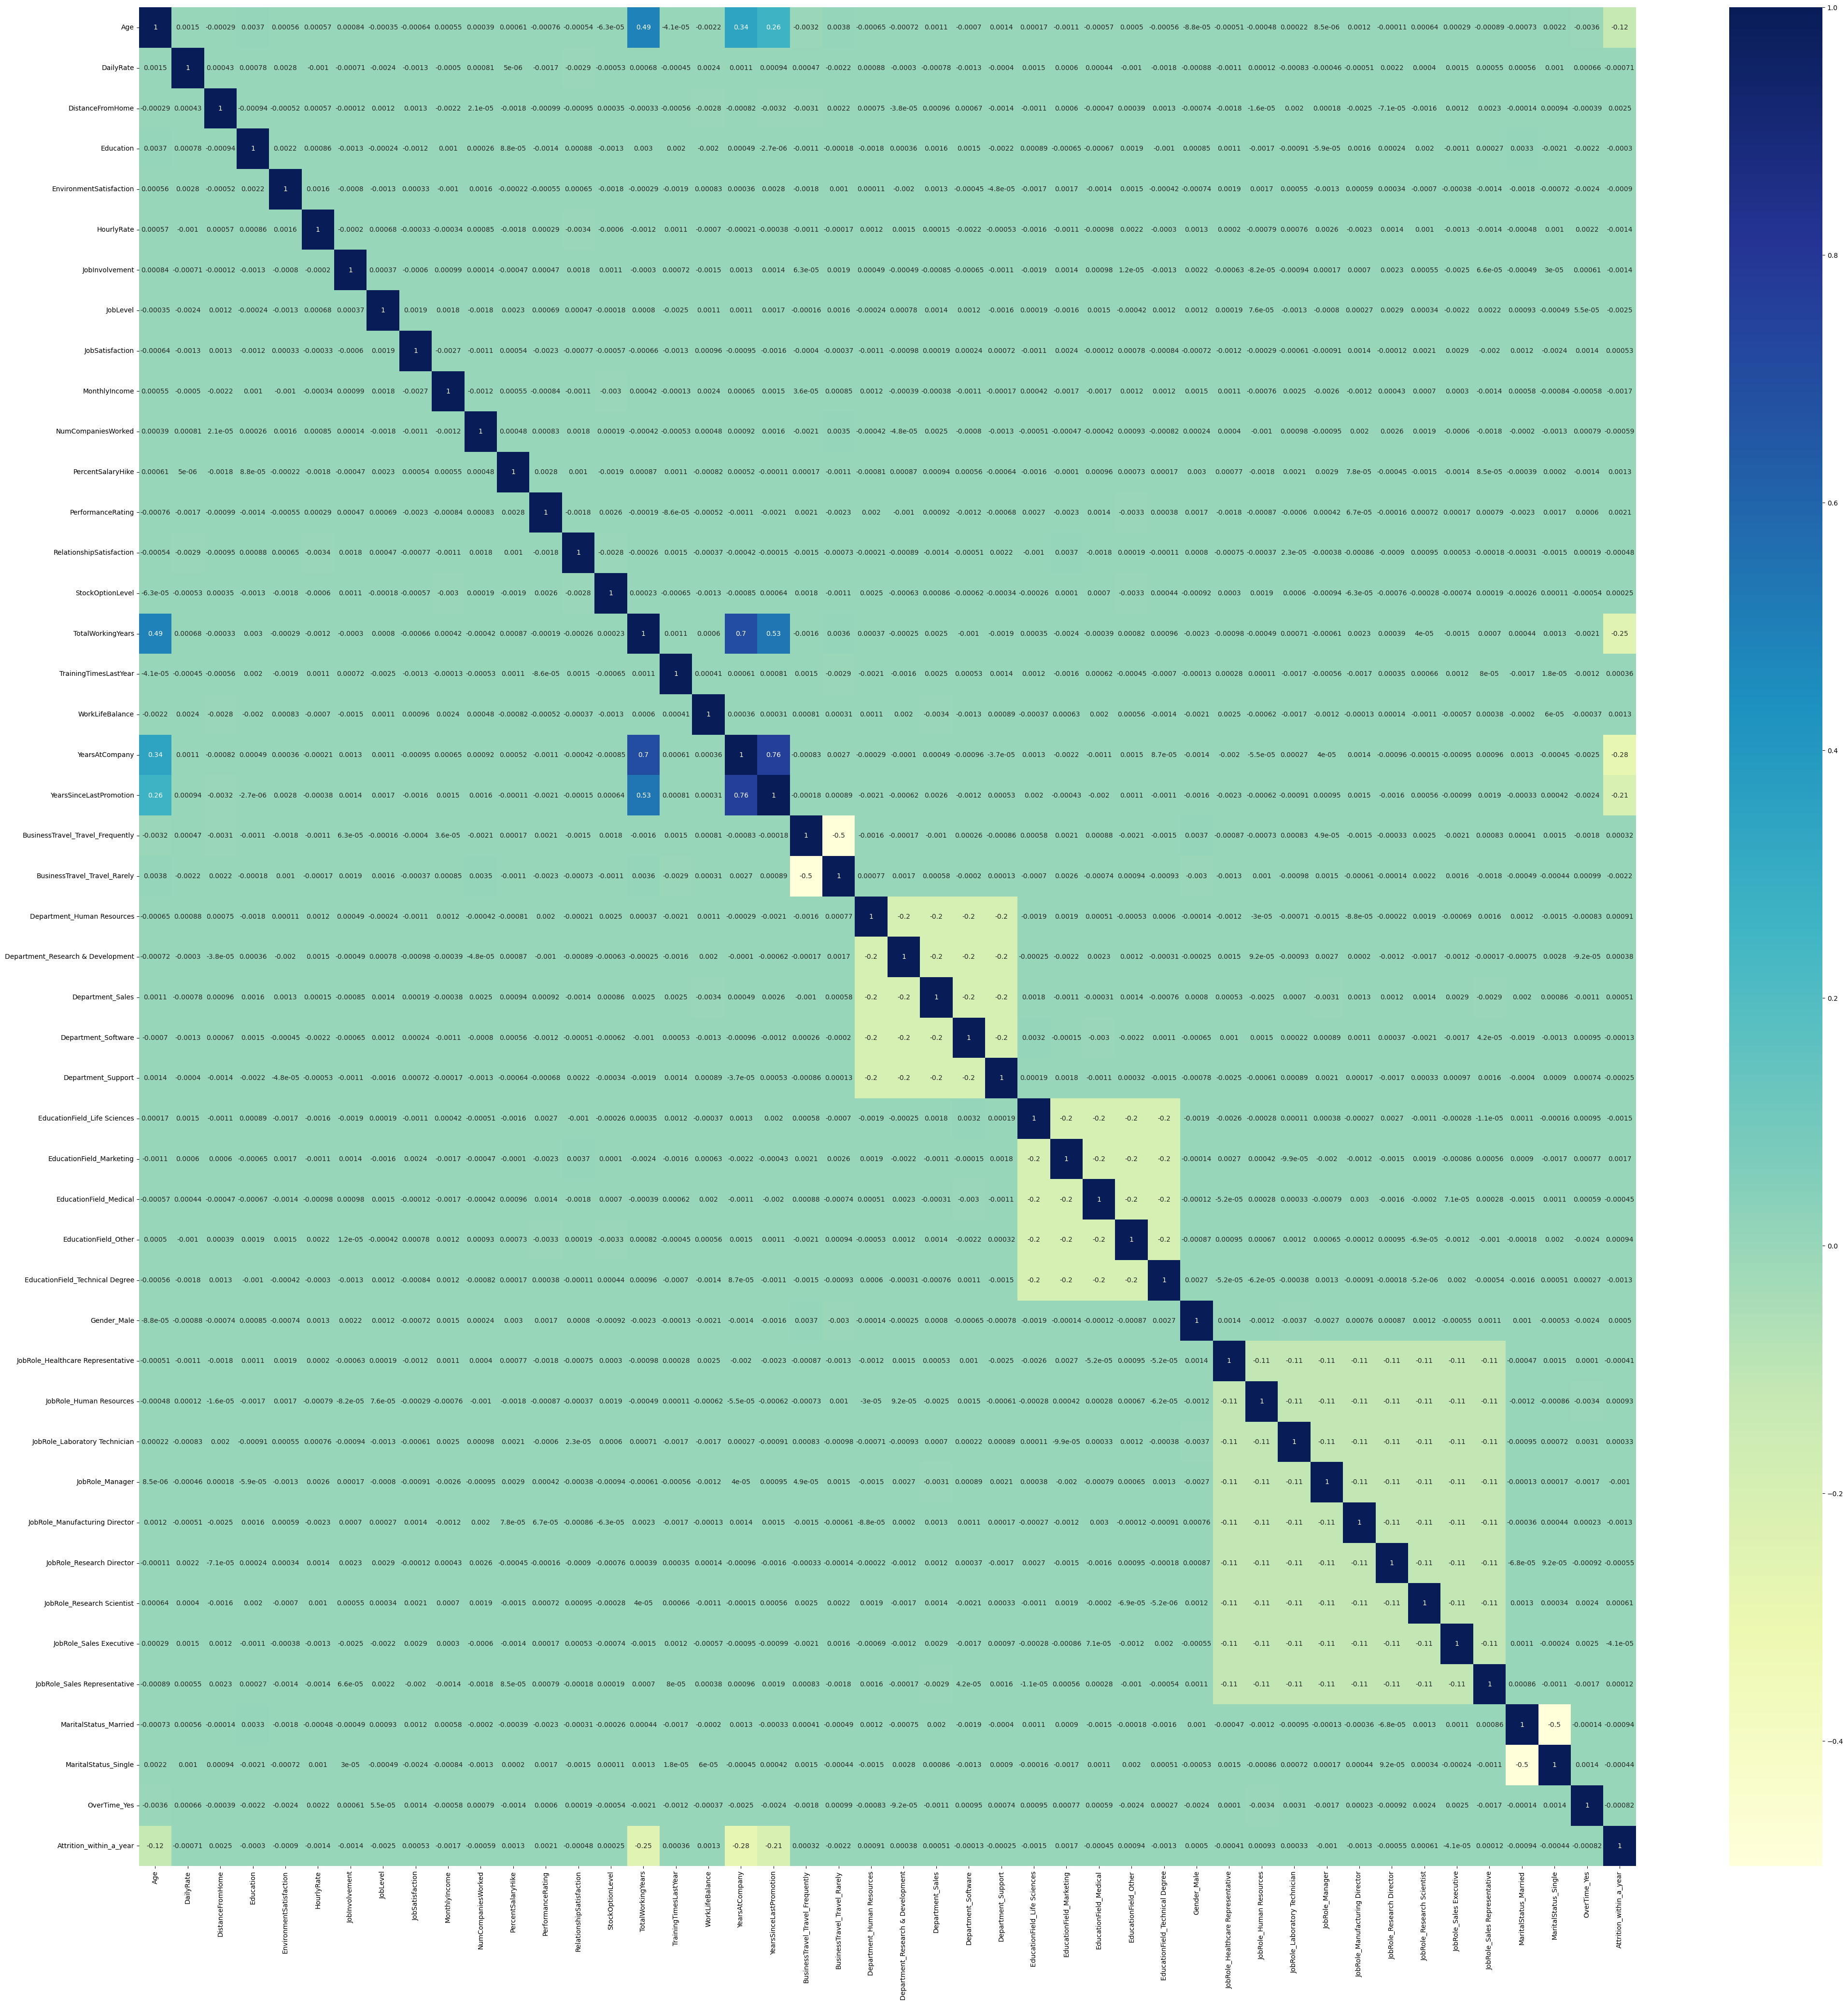

In [13]:
plt.figure(figsize=(50,50))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [14]:
df["Attrition_within_a_year"].value_counts()

0    503279
1     42942
Name: Attrition_within_a_year, dtype: int64

#### As you can it is in imbalanced form 

### Train_Test_Split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x=df.drop("Attrition_within_a_year",axis=1)

In [17]:
y=df["Attrition_within_a_year"]

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 200)

## Handling Imbalanced Dataset

### Using Over Sampling Technique

In [19]:
from imblearn.over_sampling import SMOTE 

In [20]:
sm=SMOTE(random_state=2)

In [21]:
x_res,y_res=sm.fit_resample(x,y.ravel())

In [22]:
x_res.shape,y_res.shape

((1006558, 45), (1006558,))

In [23]:
df_train,df_test,y_train,y_test = train_test_split(x_res,y_res,test_size = 0.2,random_state = 200)

In [29]:
df_train

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Department_Software,Department_Support,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
653306,58,1448,46,2,2,44,2,2,3,17732,7,15,3,2,2,5,2,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
108402,37,982,2,2,1,165,1,1,2,46914,8,41,4,1,4,17,3,1,7,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
819764,34,1207,37,2,1,121,2,2,1,36728,3,28,3,2,1,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
382514,52,1445,6,3,1,179,2,5,1,18719,1,42,2,3,2,3,5,3,3,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
972205,48,593,32,2,2,44,2,1,4,43911,0,38,4,2,3,16,3,2,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781098,36,994,36,2,2,123,2,4,2,40063,3,27,1,3,3,17,2,2,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
522052,42,537,23,3,1,67,3,4,4,16653,8,4,3,3,2,4,2,3,1,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
983824,23,593,47,4,1,191,1,2,3,41920,0,6,2,1,1,4,4,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12905,40,960,12,3,3,148,1,1,3,27733,3,29,2,1,4,2,6,4,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


### Logistic Regression

In [30]:
lr1 = LogisticRegression().fit(df_train,y_train)
Pred = lr1.predict(df_test)

In [31]:
print("Training Accuracy:",lr1.score(df_train,y_train))
print("-------------------------------------------------------------")
print("Testing Accuracy:\n" ,acs(y_test,Pred))
print("-------------------------------------------------")
print("Confusion Matrix:\n",  cm(y_test,Pred))
print("-------------------------------------------------")
print("Classsification Report:\n",cr(y_test,Pred))

Training Accuracy: 0.8111906175255761
-------------------------------------------------------------
Testing Accuracy:
 0.8113823319027181
-------------------------------------------------
Confusion Matrix:
 [[75812 24853]
 [13118 87529]]
-------------------------------------------------
Classsification Report:
               precision    recall  f1-score   support

           0       0.85      0.75      0.80    100665
           1       0.78      0.87      0.82    100647

    accuracy                           0.81    201312
   macro avg       0.82      0.81      0.81    201312
weighted avg       0.82      0.81      0.81    201312



### Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier as dtc

dt1 = dtc().fit(df_train,y_train)
Pred1 = dt1.predict(df_test)

In [33]:
print("Training Accuracy:",dt1.score(df_train,y_train))
print("-------------------------------------------------------------")
print("Testing Accuracy:\n" ,acs(y_test,Pred1))
print("-------------------------------------------------")
print("Confusion Matrix:\n",  cm(y_test,Pred1))
print("-------------------------------------------------")
print("Classsification Report:\n",cr(y_test,Pred1))

Training Accuracy: 1.0
-------------------------------------------------------------
Testing Accuracy:
 0.9557751152439994
-------------------------------------------------
Confusion Matrix:
 [[96028  4637]
 [ 4266 96381]]
-------------------------------------------------
Classsification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96    100665
           1       0.95      0.96      0.96    100647

    accuracy                           0.96    201312
   macro avg       0.96      0.96      0.96    201312
weighted avg       0.96      0.96      0.96    201312



### Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier as rfc
rf1 = rfc().fit(df_train,y_train)
Pred2 = rf1.predict(df_test)

In [35]:
print("Training Accuracy:",rf1.score(df_train,y_train))
print("-------------------------------------------------------------")
print("Testing Accuracy:\n" ,acs(y_test,Pred2))
print("-------------------------------------------------")
print("Confusion Matrix:\n",  cm(y_test,Pred2))
print("-------------------------------------------------")
print("Classsification Report:\n",cr(y_test,Pred2))

Training Accuracy: 1.0
-------------------------------------------------------------
Testing Accuracy:
 0.9580899300588142
-------------------------------------------------
Confusion Matrix:
 [[94478  6187]
 [ 2250 98397]]
-------------------------------------------------
Classsification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96    100665
           1       0.94      0.98      0.96    100647

    accuracy                           0.96    201312
   macro avg       0.96      0.96      0.96    201312
weighted avg       0.96      0.96      0.96    201312



<AxesSubplot:>

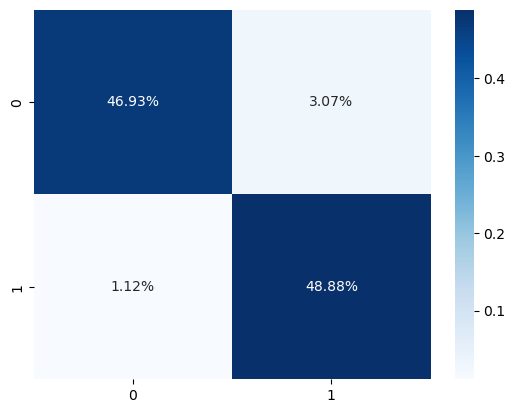

In [36]:
cf_matrix=cm(y_test,Pred2)
sns.heatmap(cf_matrix/np.sum(cf_matrix),annot=True,fmt=".2%",cmap="Blues")

### Naive Bayes Classifier

In [25]:
nb=GaussianNB()
nb.fit(df_train,y_train)
y_pred1=nb.predict(df_test)

In [37]:
print("Training Accuracy:",nb.score(df_train,y_train))
print("-------------------------------------------------------------")
print("Testing Accuracy:\n" ,acs(y_test,y_pred1))
print("-------------------------------------------------")
print("Confusion Matrix:\n",  cm(y_test,y_pred1))
print("-------------------------------------------------")
print("Classsification Report:\n",cr(y_test,y_pred1))

Training Accuracy: 0.9038654026223042
-------------------------------------------------------------
Testing Accuracy:
 0.9031900731203306
-------------------------------------------------
Confusion Matrix:
 [[ 81478  19187]
 [   302 100345]]
-------------------------------------------------
Classsification Report:
               precision    recall  f1-score   support

           0       1.00      0.81      0.89    100665
           1       0.84      1.00      0.91    100647

    accuracy                           0.90    201312
   macro avg       0.92      0.90      0.90    201312
weighted avg       0.92      0.90      0.90    201312



### xgboost

In [38]:
import xgboost as xgb
from xgboost import XGBClassifier

In [39]:
xgb_classifier = xgb.XGBClassifier(n_estimators=10,n_jobs=-1,learning_rate=0.01)
xgb_classifier.fit(df_train,y_train)
predictions = xgb_classifier.predict(df_test)

In [40]:
print("Training Accuracy:",xgb_classifier.score(df_train,y_train))
print("-------------------------------------------------------------")
print("Testing Accuracy:\n" ,acs(y_test,predictions))
print("-------------------------------------------------")
print("Confusion Matrix:\n",  cm(y_test,predictions))
print("-------------------------------------------------")
print("Classsification Report:\n",cr(y_test,predictions))

Training Accuracy: 0.9573236004897883
-------------------------------------------------------------
Testing Accuracy:
 0.9568083373072643
-------------------------------------------------
Confusion Matrix:
 [[ 91971   8694]
 [     1 100646]]
-------------------------------------------------
Classsification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95    100665
           1       0.92      1.00      0.96    100647

    accuracy                           0.96    201312
   macro avg       0.96      0.96      0.96    201312
weighted avg       0.96      0.96      0.96    201312



### LGBMClassifier

In [41]:
%%time
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(boosting_type='gbdt',
    num_leaves=5000,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=5000,
    subsample_for_bin=2000,
    objective='binary',
    
    min_child_samples=5000,

    reg_alpha=0.9,
    reg_lambda=0.9,
metric='binary_logloss', #metric for binary classification
    
    n_jobs=-1,
    silent=True,
    importance_type='',
    random_state=6)
lightgbm=lgbm.fit(df_train, y_train)
y_pred = lightgbm.predict(df_test)

CPU times: total: 1h 45min 23s
Wall time: 1h 37min 52s


In [42]:
print("Testing Accuracy:\n" ,acs(y_test,y_pred))
print("-------------------------------------------------")
print("Confusion Matrix:\n",  cm(y_test,y_pred))
print("-------------------------------------------------")
print("Classsification Report:\n",cr(y_test,y_pred))

Testing Accuracy:
 0.9590983150532507
-------------------------------------------------
Confusion Matrix:
 [[96007  4658]
 [ 3576 97071]]
-------------------------------------------------
Classsification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96    100665
           1       0.95      0.96      0.96    100647

    accuracy                           0.96    201312
   macro avg       0.96      0.96      0.96    201312
weighted avg       0.96      0.96      0.96    201312



### Gradient Boosting Classifier

In [43]:
gradientboosting=gbc().fit(df_train,y_train)
p6=gradientboosting.predict(df_test)

In [44]:
print("Training Accuracy:",gradientboosting.score(df_train,y_train))
print("-------------------------------------------------------------")
print("Testing Accuracy:",acs(y_test,p6))
print("------------------------------------------------------------")
print("confusion_matrix:\n",cm(y_test,p6))
print("------------------------------------------------------------")
print("classifiction_report:\n",cr(y_test,p6))


Training Accuracy: 0.9576452413299786
-------------------------------------------------------------
Testing Accuracy: 0.9568927833412813
------------------------------------------------------------
confusion_matrix:
 [[93596  7069]
 [ 1609 99038]]
------------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.96    100665
           1       0.93      0.98      0.96    100647

    accuracy                           0.96    201312
   macro avg       0.96      0.96      0.96    201312
weighted avg       0.96      0.96      0.96    201312



In [45]:
from sklearn.metrics import roc_curve
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, Pred[:,], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, Pred1[:,], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, Pred2[:,], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, y_pred1[:,], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, predictions[:,], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, y_pred[:,], pos_label=1)
fpr7, tpr7, thresh7 = roc_curve(y_test, p6[:,], pos_label=1)

# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [46]:
from sklearn.metrics import roc_auc_score
# auc scores
auc_score1 = roc_auc_score(y_test, Pred[:,])
auc_score2 = roc_auc_score(y_test, Pred1[:,])
auc_score3 = roc_auc_score(y_test, Pred2[:,])
auc_score4 = roc_auc_score(y_test, y_pred1[:,])
auc_score5 = roc_auc_score(y_test, predictions[:,])
auc_score6 = roc_auc_score(y_test, y_pred[:,])
auc_score7 = roc_auc_score(y_test, p6[:,])
print(auc_score1, auc_score2,auc_score3,auc_score4,auc_score5,auc_score6,auc_score7)

0.8113875425372005 0.9557752796714156 0.9580916783564561 0.9031984601869977 0.9568121979891576 0.959098795300441 0.9568952080752773


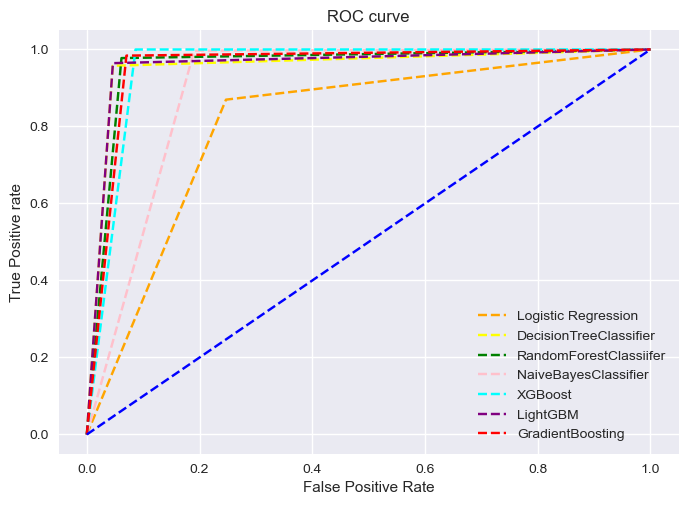

In [48]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='yellow', label='DecisionTreeClassifier')
plt.plot(fpr3, tpr3, linestyle='--',color='green', label='RandomForestClassiifer')
plt.plot(fpr4, tpr4, linestyle='--',color='pink', label='NaiveBayesClassifier')
plt.plot(fpr5, tpr5, linestyle='--',color='cyan', label='XGBoost')
plt.plot(fpr6, tpr6, linestyle='--',color='purple', label='LightGBM')
plt.plot(fpr7, tpr7, linestyle='--',color='red', label='GradientBoosting')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### As Random forest classifier got the better accuracy so we are using this model for development.

In [61]:
import pickle
pickle_out = open('classifier1.pkl',"wb")
pickle.dump(rf1,pickle_out)
pickle_out.close()